In [1]:
import os
import h5py
import subprocess
import numpy as np 

from astropy.io import fits
from pydl.pydlutils.spheregroup import spherematch

from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA-Legacy catalog

In [3]:
# read in GAMA-Legacy catalog
cata = Cat.GamaLegacy()
gleg = cata.Read()
cataid = gleg['gama-photo']['cataid'] # GAMA catalog id of each object
ngal = len(cataid)

In [4]:
print('%i galaxies with GAMA-Legacy catalog' % ngal)

39832 galaxies with GAMA-Legacy catalog


In [5]:
#
f_gama_sdss = fits.open(''.join([UT.dat_dir(), 'gama/ExternalSpecAll.fits']))
fdata = f_gama_sdss[1].data

In [13]:
fdata.names

['SPECID',
 'SURVEY',
 'RA',
 'DEC',
 'WMIN',
 'WMAX',
 'Z',
 'NQ',
 'PROB',
 'FILENAME',
 'URL',
 'URL_IMG',
 'CATAID',
 'GAMA_NAME',
 'IC_FLAG',
 'DIST',
 'IS_SBEST']

In [15]:
print fdata.field('SPECID')[fdata.field("SURVEY") == 'SDSS'][:10]
print fdata.field('RA')[fdata.field("SURVEY") == 'SDSS'][:10] 
print fdata.field('Dec')[fdata.field("SURVEY") == 'SDSS'][:10] 
print fdata.field('Z')[fdata.field("SURVEY") == 'SDSS'][:10] 

['85508603036827648' '85508603053604864' '86071544291262464'
 '132797727590318080' '92828848596451328' '87197673190326272'
 '92828847778562048' '133360699471560704' '131671727867428864'
 '80443406383316992']
[214.24123 214.19898 217.29903 135.73344 177.6942  223.20035 176.27012
 140.17268 132.29052 179.80848]
[-0.95861 -1.07057 -0.23759  1.77393 -1.96023  0.32503 -1.82894  2.16178
  0.84326 -0.80916]
[3.2000e-04 1.2513e-01 3.4500e-02 1.1796e-01 1.9380e-02 3.0463e-01
 3.9391e-01 3.0890e-01 1.1031e-01 1.7514e-01]


Read in SDSS specObj 

In [6]:
f_sdss = h5py.File(''.join([UT.dat_dir(), 'sdss/specObj-dr8.hdf5']), 'r') 
ra_sdss = f_sdss['plug_ra'].value
dec_sdss = f_sdss['plug_dec'].value 

In [9]:
print('%i galaxies with DR8 specObj' % len(ra_sdss))

1843200 galaxies with DR8 specObj


In [23]:
f_sdss['z'].value.min(), f_sdss['z'].value.max()

(-0.011547931, 7.011245)

In [10]:
m_sdss, m_gleg, d_match = spherematch(ra_sdss, dec_sdss, 
                                      gleg['gama-photo']['ra'], gleg['gama-photo']['dec'], 3*0.000277778)

In [11]:
print d_match[:10]

[2.56951335e-06 3.22863621e-06 3.73397278e-06 3.74748738e-06
 3.96299739e-06 4.37765304e-06 4.73082923e-06 4.91454986e-06
 5.61365811e-06 5.98384026e-06]


In [13]:
print('%i matching galaxies' % len(m_sdss))

204 matching galaxies


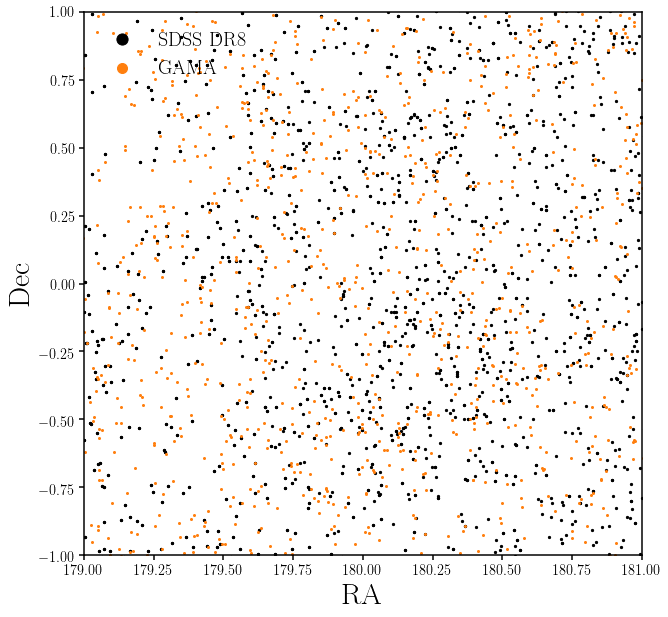

In [34]:
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)
sub.scatter(ra_sdss, dec_sdss, c='k', s=5, label='SDSS DR8')
sub.scatter(gleg['gama-photo']['ra'], gleg['gama-photo']['dec'], c='C1', s=4, label='GAMA')
sub.set_xlabel('RA', fontsize=30)
sub.set_xlim([179., 181.])
sub.set_ylabel('Dec', fontsize=30)
sub.set_ylim([-1., 1.])
sub.legend(loc='upper left', markerscale=5, prop={'size':20})